In [5]:
import pandas as pd
import numpy as np
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches

In [4]:
#Function to convert columns REQTIME, USEDTIME to Seconds

def TimeToSeconds(inputTime):
    #Initialize variables
    day = 0
    time=""
    hh=0
    mm=0
    ss=0
    timeTotal=0

    if inputTime.find("-") > -1:
        timeTotal = inputTime.split("-", 1)
        if len(timeTotal) > 1 :
            day = int(timeTotal[0])
            time=timeTotal[1]            
    else :    
        time=inputTime

    timePart=time.split(":")    
    if len(timePart) > 2 :        
        hh = int(timePart[0])
        mm = int(timePart[1])
        ss = int(timePart[2])
    #print("Days:"+ str(day) + " hh:" + str(hh) + " mm:" + str(mm) + " ss:" + str(ss))
    delta = timedelta(days=day, hours=hh, minutes=mm, seconds=ss)
    #print(delta.seconds)
    return int(delta.total_seconds())


#To Test - Uncomment below lines
#secs = TimeToSeconds("1-01:01:05")
#print(secs)

In [6]:
gpu_df = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines="skip")


In [7]:
gpu_df = gpu_df.replace({'USEDMEM': r'[M]+'}, {'USEDMEM': ''}, regex=True)


In [8]:
#Convert time to seconds
gpu_df["REQTIME_SEC"] = gpu_df['REQTIME'].apply(TimeToSeconds) 
gpu_df["USEDTIME_SEC"] = gpu_df['USEDTIME'].apply(TimeToSeconds) 
gpu_df


,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,172800,793
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,18000,22
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,18000,537
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,72000,18586
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,54000,15070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING,432000,427
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,172800,0
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,172800,0
336948,46754598,glasshouse,treva,145.24,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED,86400,86


In [9]:
gpu_df["REQTIME_HOURS"] = gpu_df["REQTIME_SEC"]/3600

In [10]:
gpu_df["USEDTIME_HOURS"] = gpu_df["USEDTIME_SEC"]/3600

In [11]:
gpu_df["TIME_DIFF_SEC"] = gpu_df["REQTIME_SEC"] - gpu_df["USEDTIME_SEC"]

In [12]:
gpu_df["TIME_DIFF_HOURS"] = (gpu_df["REQTIME_SEC"] - gpu_df["USEDTIME_SEC"])/3600
gpu_df

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,REQTIME_HOURS,USEDTIME_HOURS,TIME_DIFF_SEC,TIME_DIFF_HOURS
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,172800,793,48.0,0.220278,172007,47.779722
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,18000,22,5.0,0.006111,17978,4.993889
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,18000,537,5.0,0.149167,17463,4.850833
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,72000,18586,20.0,5.162778,53414,14.837222
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,54000,15070,15.0,4.186111,38930,10.813889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING,432000,427,120.0,0.118611,431573,119.881389
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,172800,0,48.0,0.000000,172800,48.000000
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING,172800,0,48.0,0.000000,172800,48.000000
336948,46754598,glasshouse,treva,145.24,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED,86400,86,24.0,0.023889,86314,23.976111


In [17]:
#pd.set_option('display.max_rows', None)

pd.DataFrame(gpu_df.STATE.unique())

,0
0,COMPLETED
1,CANCELLED by 9201
2,CANCELLED by 859023
3,CANCELLED by 153500
4,CANCELLED by 168618
...,...
93,CANCELLED by 778999
94,OUT_OF_MEMORY
95,CANCELLED by 767350
96,CANCELLED by 910235


In [14]:
gpu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336950 entries, 0 to 336949
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   JOBID            336950 non-null  object 
 1   ACCOUNT          336950 non-null  object 
 2   USER             336950 non-null  object 
 3   USEDMEM          336950 non-null  object 
 4   REQTIME          336950 non-null  object 
 5   USEDTIME         336950 non-null  object 
 6   NODES            336950 non-null  int64  
 7   CPUS             336950 non-null  int64  
 8   GPUS             336950 non-null  int64  
 9   PARTITION        336950 non-null  object 
 10  EXITCODE         336950 non-null  object 
 11  STATE            336950 non-null  object 
 12  REQTIME_SEC      336950 non-null  int64  
 13  USEDTIME_SEC     336950 non-null  int64  
 14  REQTIME_HOURS    336950 non-null  float64
 15  USEDTIME_HOURS   336950 non-null  float64
 16  TIME_DIFF_SEC    336950 non-null  int6

In [18]:
gpu_df = gpu_df.astype({"USEDMEM": float})

In [19]:
gpu_completed_df= gpu_df[gpu_df["STATE"] =="COMPLETED"]
gpu_completed_df


,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,REQTIME_HOURS,USEDTIME_HOURS,TIME_DIFF_SEC,TIME_DIFF_HOURS
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,172800,793,48.0,0.220278,172007,47.779722
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,18000,22,5.0,0.006111,17978,4.993889
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,18000,537,5.0,0.149167,17463,4.850833
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,72000,18586,20.0,5.162778,53414,14.837222
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,54000,15070,15.0,4.186111,38930,10.813889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,432000,52,120.0,0.014444,431948,119.985556
336934,46753820_26,harovin,porsha,5093.70,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,432000,2091,120.0,0.580833,429909,119.419167
336936,46753823,harovin,shannon,156.21,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,432000,243,120.0,0.067500,431757,119.932500
336942,46754095,harovin,shannon,2820.52,5-00:00:00,00:11:13,1,1,1,turing,0:0,COMPLETED,432000,673,120.0,0.186944,431327,119.813056


In [106]:

gpu_completed_df[gpu_completed_df["USEDTIME_SEC"] < 3600].sort_values(by=['USEDTIME_SEC','REQTIME_SEC'], ascending=False) # 2 HOURS

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,TIME_DIFF_SEC,TIME_DIFF_HOURS,REQTIME_HOURS,USEDTIME_HOURS
301114,45214644_415,glasshouse,collins,6056.07,5-00:00:00,00:59:58,1,1,1,pascal,0:0,COMPLETED,432000,3598,428402,119.000556,120.0,0.999444
306031,45214654_333,glasshouse,collins,6067.35,5-00:00:00,00:59:58,1,1,1,maxwell,0:0,COMPLETED,432000,3598,428402,119.000556,120.0,0.999444
300792,45214644_93,glasshouse,collins,6065.67,5-00:00:00,00:59:57,1,1,1,pascal,0:0,COMPLETED,432000,3597,428403,119.000833,120.0,0.999167
301437,45214645_238,glasshouse,collins,6064.56,5-00:00:00,00:59:57,1,1,1,pascal,0:0,COMPLETED,432000,3597,428403,119.000833,120.0,0.999167
305344,45214653_146,glasshouse,collins,6080.82,5-00:00:00,00:59:57,1,1,1,maxwell,0:0,COMPLETED,432000,3597,428403,119.000833,120.0,0.999167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317085,45336231,glasshouse,treva,0.00,1-00:00:00,00:00:00,1,4,1,turing,0:0,COMPLETED,86400,0,86400,24.000000,24.0,0.000000
317086,45336232,glasshouse,treva,0.00,1-00:00:00,00:00:00,1,4,1,turing,0:0,COMPLETED,86400,0,86400,24.000000,24.0,0.000000
317087,45336233,glasshouse,treva,0.00,1-00:00:00,00:00:00,1,4,1,turing,0:0,COMPLETED,86400,0,86400,24.000000,24.0,0.000000
62932,37204975,pasilla,gibson,33795.00,12:00:00,00:00:00,1,24,4,turing,0:0,COMPLETED,43200,0,43200,12.000000,12.0,0.000000


In [65]:

gpu_completed_df[gpu_completed_df["USEDTIME_SEC"] < 7200].sort_values(by=['USEDTIME_SEC','REQTIME_SEC'], ascending=False) # 2 HOURS

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,TIME_DIFF_SEC,TIME_DIFF_HOURS
326737,45541095,glasshouse,erick,247.92,04:00:00,01:59:59,1,1,1,maxwell,0:0,COMPLETED,14400,7199,7201,2.000278
329104,45711685,glasshouse,erick,250.88,04:00:00,01:59:59,1,1,1,maxwell,0:0,COMPLETED,14400,7199,7201,2.000278
329174,45711755,glasshouse,erick,241.04,04:00:00,01:59:59,1,1,1,maxwell,0:0,COMPLETED,14400,7199,7201,2.000278
331206,45921059,glasshouse,treva,17460.97,1-00:00:00,01:59:58,1,2,1,pascal,0:0,COMPLETED,86400,7198,79202,22.000556
326579,45540937,glasshouse,erick,249.89,04:00:00,01:59:58,1,1,1,maxwell,0:0,COMPLETED,14400,7198,7202,2.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317085,45336231,glasshouse,treva,0.00,1-00:00:00,00:00:00,1,4,1,turing,0:0,COMPLETED,86400,0,86400,24.000000
317086,45336232,glasshouse,treva,0.00,1-00:00:00,00:00:00,1,4,1,turing,0:0,COMPLETED,86400,0,86400,24.000000
317087,45336233,glasshouse,treva,0.00,1-00:00:00,00:00:00,1,4,1,turing,0:0,COMPLETED,86400,0,86400,24.000000
62932,37204975,pasilla,gibson,33795.00,12:00:00,00:00:00,1,24,4,turing,0:0,COMPLETED,43200,0,43200,12.000000


In [66]:
#req Time 5 days
gpu_completed_df[gpu_completed_df["REQTIME_SEC"] >= 432000].sort_values(by=['USEDTIME_SEC','REQTIME_SEC'], ascending=False) # 2 HOURS

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,TIME_DIFF_SEC,TIME_DIFF_HOURS
82721,40954771,glasshouse,mel,7465.59,12-00:00:00,8-03:15:34,3,21,16,pascal,0:0,COMPLETED,1036800,702934,333866,92.740556
330597,45754711_9,harovin,porsha,17932.89,5-00:00:00,5-00:04:26,1,6,1,turing,0:0,COMPLETED,432000,432266,-266,-0.073889
330598,45754711_10,harovin,porsha,18744.37,5-00:00:00,5-00:04:25,1,6,1,turing,0:0,COMPLETED,432000,432265,-265,-0.073611
59290,35860195,harovin,porsha,4045.17,5-00:00:00,5-00:02:24,1,3,1,turing,0:0,COMPLETED,432000,432144,-144,-0.040000
59321,35863149,harovin,porsha,4550.14,5-00:00:00,5-00:01:21,1,3,1,turing,0:0,COMPLETED,432000,432081,-81,-0.022500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206685,44600882,glasshouse,lea,13.27,5-00:00:00,00:00:02,1,8,8,pascal,0:0,COMPLETED,432000,2,431998,119.999444
330709,45772063,apple,wyman,7.42,5-00:00:00,00:00:02,1,4,4,turing,0:0,COMPLETED,432000,2,431998,119.999444
206690,44601024,glasshouse,lea,3164.99,5-00:00:00,00:00:01,1,10,8,maxwell,0:0,COMPLETED,432000,1,431999,119.999722
317691,45351658_[2],harovin,porsha,0.00,5-00:00:00,00:00:00,1,6,1,turing,0:0,COMPLETED,432000,0,432000,120.000000


In [67]:
#gpu_completed_df[gpu_completed_df["USEDTIME_SEC"] > 432000] # 12 HOURS

gpu_completed_df["REQTIME_SEC"].describe()


count    2.833330e+05
mean     8.675969e+04
std      1.277753e+05
min      6.000000e+01
25%      3.600000e+04
50%      3.600000e+04
75%      4.320000e+04
max      1.296000e+06
Name: REQTIME_SEC, dtype: float64

In [54]:
gpu_completed_df[gpu_completed_df["USEDTIME_SEC"] > gpu_completed_df["REQTIME_SEC"]].sort_values(by=['TIME_DIFF_HOURS'],ascending=True)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,TIME_DIFF_SEC,TIME_DIFF_HOURS
65652,38189174,virginia,anitra,16709.34,2-00:00:00,2-20:03:53,1,12,2,turing,0:0,COMPLETED,172800,245033,-72233,-20.064722
179215,44308490,glasshouse,minor,14203.65,16:00:00,1-06:57:20,1,6,1,turing,0:0,COMPLETED,57600,111440,-53840,-14.955556
332519,46181200,glasshouse,jones,7512.58,20:00:00,20:59:53,1,4,1,turing,0:0,COMPLETED,72000,75593,-3593,-0.998056
103744,41851525_29,glasshouse,margret,14555.82,01:30:00,02:09:47,1,4,1,turing,0:0,COMPLETED,5400,7787,-2387,-0.663056
103745,41851525_30,glasshouse,margret,14223.38,01:30:00,02:09:47,1,4,1,turing,0:0,COMPLETED,5400,7787,-2387,-0.663056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210830,44638572,virginia,whitley,283.88,04:00:00,04:00:01,1,2,1,pascal,0:0,COMPLETED,14400,14401,-1,-0.000278
216493,44722057,glasshouse,milford,1762.42,2-00:00:00,2-00:00:01,1,8,4,pascal,0:0,COMPLETED,172800,172801,-1,-0.000278
79523,40324995_43,prince,wilhelmina,4889.94,00:10:00,00:10:01,1,2,1,pascal,0:0,COMPLETED,600,601,-1,-0.000278
14314,33020507,virginia,micayla,2949.07,04:00:00,04:00:01,1,4,2,pascal,0:0,COMPLETED,14400,14401,-1,-0.000278


In [50]:

(
    gpu_completed_df[['ACCOUNT','USEDTIME_SEC' ,'REQTIME_SEC']]
    .sort_values(by=['USEDTIME_SEC','REQTIME_SEC'], ascending=False)
    .head(10)
    .plot.bar(x='ACCOUNT',stacked=True, rot=0)



SyntaxError: unexpected EOF while parsing (2844237011.py, line 6)

In [ ]:
gpu_completed_df.groupby(["PARTITION","USER"])["USEDTIME_SEC"].sum().sort_values(ascending=False).head(40)

In [12]:
gpu_completed_df.groupby(["PARTITION","USER"])["USEDTIME_SEC"].sum().sort_values(ascending=False).head(40)

PARTITION  USER      
turing     porsha        259384410
pascal     collins       130063451
           jolette       127782292
           birdella      117846335
           nakisha        92077011
turing     collins        83845950
pascal     erick          77516734
maxwell    collins        57946049
           jolette        37805404
pascal     debera         36568389
turing     valentina      35745676
           margret        33539548
maxwell    erick          33462509
pascal     brady          31617685
turing     shannon        29442753
maxwell    suzanna        23266805
turing     treva          23091906
pascal     wilhelmina     21714747
           jonnie         19014641
maxwell    marnie         18187206
           davonta        16538661
turing     jonnie         14767696
pascal     nobie          13990308
           miya           12567458
maxwell    porsha         12459110
pascal     andra          12097439
           hjalmar        11400540
           hillery        1113866

#### QUES 1. What is the distribution of per-GPU main memory usage over all runtime-weighed jobs in each partition? Knowing this will help ACCRE to understand our users memory needs for future hardware purchases.

In [29]:
#group by GPUs
gpu_completed_df.groupby(["PARTITION","GPUS"])["GPUS"].sum().sort_values(ascending=False)

PARTITION  GPUS
maxwell    1       124880
pascal     1        76517
turing     1        73464
pascal     2         6800
           16        3808
           4         3456
maxwell    2         3002
turing     4         2612
maxwell    12        1896
pascal     8         1832
turing     8         1520
maxwell    4         1256
turing     2         1138
pascal     24        1056
maxwell    8          784
           16         464
           6          264
turing     3          258
pascal     32         160
turing     16         144
pascal     60         120
turing     40         120
maxwell    40          80
pascal     12          72
maxwell    18          72
           3           36
pascal     3           27
maxwell    24          24
turing     20          20
           12          12
Name: GPUS, dtype: int64

#### 2. What is the distribution of the number of GPUs in each job (runtime-weighted) for each partition? What fraction of runtime-weighted and GPU-weighted jobs are using more than 4 GPUs and thus probably using the RoCE networking? Is this fraction different for each partition?

In [27]:
# 2- A
gpu_completed_df.groupby(["PARTITION","GPUS"])["GPUS"].sum().sort_values(ascending=False)

PARTITION  GPUS
maxwell    1       124880
pascal     1        76517
turing     1        73464
pascal     2         6800
           16        3808
           4         3456
maxwell    2         3002
turing     4         2612
maxwell    12        1896
pascal     8         1832
turing     8         1520
maxwell    4         1256
turing     2         1138
pascal     24        1056
maxwell    8          784
           16         464
           6          264
turing     3          258
pascal     32         160
turing     16         144
pascal     60         120
turing     40         120
maxwell    40          80
pascal     12          72
maxwell    18          72
           3           36
pascal     3           27
maxwell    24          24
turing     20          20
           12          12
Name: GPUS, dtype: int64

##### 2-B What fraction of runtime-weighted and GPU-weighted jobs are using more than 4 GPUs and thus probably using the RoCE networking?

In [38]:
gpu_completed_df[gpu_completed_df["GPUS"] > 4].shape[0] 
#gpu_completed_df.shape[0] 
Fraction_Jobs_Using_4GPUs = 100 * (gpu_completed_df[gpu_completed_df["GPUS"] > 4].shape[0] / gpu_completed_df.shape[0]) 
Fraction_Jobs_Using_4GPUs

0.3755298535645336

 #### QUES 3 - What is the total runtime usage per-gpu  (i.e. multiply runtime by the number of gpus) in each of the 3 partitions over the last year? 
 gpu_completed_df.groupby(["PARTITION"])["USEDTIME_SEC"].sum().sort_values(ascending=False).head(40)

gpu_completed_df_q3 = gpu_completed_df
gpu_completed_df_q3["USAGE_PER_GPU"] = gpu_completed_df_q3["GPUS"] * gpu_completed_df_q3["USEDTIME_SEC"]
gpu_completed_df_q3.groupby(["PARTITION"])["USAGE_PER_GPU"].sum()

In [14]:
gpu_completed_df_q3["USAGE_PER_GPU"] = gpu_completed_df_q3["GPUS"] * gpu_completed_df_q3["USEDTIME_SEC"]
gpu_completed_df_q3.groupby(["PARTITION"])["USAGE_PER_GPU"].sum()

C:\Users\kalea\AppData\Local\Temp\ipykernel_24544\4267298315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_completed_df_q3["USAGE_PER_GPU"] = gpu_completed_df_q3["GPUS"] * gpu_completed_df_q3["USEDTIME_SEC"]


PARTITION
maxwell     333725892
pascal     1205542217
turing      736742148
Name: USAGE_PER_GPU, dtype: int64

In [15]:
#gpu_completed_df.groupby(["ACCOUNT","USER","PARTITION"])["USEDTIME_SEC"].sum().sort_values(ascending=False).head(40)
q4_acc = gpu_completed_df.groupby(["PARTITION","ACCOUNT"])["USEDTIME_SEC"].sum().sort_values(ascending=False).head(40)
#q4_acc.max()
q4_acc

#4. What is the distribution of different groups and users accessing each partition? 
#In each partition, who are the top users, and do they represent a majority 
#of the runtime-weighted jobs on the partition?

PARTITION  ACCOUNT      
pascal     glasshouse       577448282
turing     harovin          324989415
           glasshouse       191184029
maxwell    glasshouse       166155290
pascal     antares           95915871
           grisette          55927378
           virginia          35108658
turing     virginia          24839138
maxwell    clara             23266805
pascal     prince            21733671
           pecans            16617728
maxwell    orange            16538661
           plumcot           14818841
pascal     sunburst          10289218
           malanga            9030984
           kinnow             6349310
turing     almonds            2331633
maxwell    white              2048632
pascal     horseradish        1739520
turing     pinole             1334125
           apple              1116913
           cactus              849156
pascal     packham             763283
turing     bertanne            738923
           prince              609608
           pasilla       

#### 5. Currently there is a 5 day limit on runtime for GPU jobs, although some users have been asking for extensions. What is the distribution of requested runtime and actual runtime on jobs on each partition? Do users really need more time, or are they simply always requesting the maximum?

In [20]:
#Filter on 5 days of REQTIME_SEC
gpu_completed_df_Q5 = gpu_completed_df[gpu_completed_df["REQTIME_SEC"] >= 5 * 24 * 3600] 
gpu_completed_df_Q5

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,REQTIME_HOURS,USEDTIME_HOURS,TIME_DIFF_SEC,TIME_DIFF_HOURS
327,32884086,glasshouse,miya,374.89,5-00:00:00,1-08:38:34,1,1,1,pascal,0:0,COMPLETED,432000,117514,120.0,32.642778,314486,87.357222
1063,32891995,glasshouse,erick,242.00,5-00:00:00,4-19:44:31,1,1,1,pascal,0:0,COMPLETED,432000,416671,120.0,115.741944,15329,4.258056
1064,32891996,glasshouse,erick,244.33,5-00:00:00,4-19:44:31,1,1,1,pascal,0:0,COMPLETED,432000,416671,120.0,115.741944,15329,4.258056
1065,32891997,glasshouse,erick,243.17,5-00:00:00,4-19:44:31,1,1,1,pascal,0:0,COMPLETED,432000,416671,120.0,115.741944,15329,4.258056
1066,32891998,glasshouse,erick,243.82,5-00:00:00,4-19:44:31,1,1,1,pascal,0:0,COMPLETED,432000,416671,120.0,115.741944,15329,4.258056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336929,46753800,harovin,shannon,160.03,5-00:00:00,00:00:37,1,1,1,turing,0:0,COMPLETED,432000,37,120.0,0.010278,431963,119.989722
336933,46753813,harovin,shannon,137.96,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,432000,52,120.0,0.014444,431948,119.985556
336934,46753820_26,harovin,porsha,5093.70,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,432000,2091,120.0,0.580833,429909,119.419167
336936,46753823,harovin,shannon,156.21,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,432000,243,120.0,0.067500,431757,119.932500


In [89]:
gpu_completed_df_Q5.shape[0]

4

In [17]:
gpu_completed_df_Q5[["PARTITION","REQTIME_SEC", "USEDTIME_SEC"]].groupby('PARTITION').sum()

,REQTIME_SEC,USEDTIME_SEC
PARTITION,,
maxwell,2592000,627286
pascal,1036800,702934
turing,950400,93354


In [ ]:
(2592000/627286 ) * 100

In [18]:
#Check completed jobs by Partition and GPUS
gpu_completed_df.groupby(["PARTITION","GPUS"])["USEDMEM"].sum()

#1. What is the distribution of per-GPU main memory usage over all runtime-weighed jobs in each partition? 
#Knowing this will help ACCRE to understand our users memory needs for future hardware purchases.

PARTITION  GPUS
maxwell    1       1.216627e+08
           2       4.527200e+06
           3       2.081270e+04
           4       4.607327e+06
           6       5.053232e+05
           8       3.238567e+05
           12      8.765281e+05
           16      2.053680e+05
           18      3.505690e+04
           24      3.554550e+03
           40      2.409000e+01
pascal     1       1.805068e+08
           2       1.795529e+07
           3       3.769252e+05
           4       1.096731e+07
           8       3.073291e+06
           12      8.875734e+04
           16      2.377205e+06
           24      4.386576e+05
           32      6.498074e+04
           60      9.940000e+00
turing     1       2.652419e+08
           2       8.365955e+06
           3       2.386715e+06
           4       8.712111e+06
           8       1.451311e+06
           12      9.600000e+00
           16      1.493039e+05
           20      0.000000e+00
           40      2.141000e+01
Name: USEDMEM, dtype: fl

In [19]:
gpu_completed_df.groupby(["PARTITION","REQTIME_SEC","USEDTIME_SEC"])["REQTIME_SEC"].sum()

PARTITION  REQTIME_SEC  USEDTIME_SEC
maxwell    60           5                   60
                        66                  60
           600          24                 600
           1200         1                 1200
                        2                 1200
                                         ...  
turing     432000       432081          432000
                        432144          432000
                        432265          432000
                        432266          432000
           950400       93354           950400
Name: REQTIME_SEC, Length: 47325, dtype: int64

In [17]:
gpu_completed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283333 entries, 0 to 336948
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   JOBID            283333 non-null  object 
 1   ACCOUNT          283333 non-null  object 
 2   USER             283333 non-null  object 
 3   USEDMEM          283333 non-null  float64
 4   REQTIME          283333 non-null  object 
 5   USEDTIME         283333 non-null  object 
 6   NODES            283333 non-null  int64  
 7   CPUS             283333 non-null  int64  
 8   GPUS             283333 non-null  int64  
 9   PARTITION        283333 non-null  object 
 10  EXITCODE         283333 non-null  object 
 11  STATE            283333 non-null  object 
 12  REQTIME_SEC      283333 non-null  int64  
 13  USEDTIME_SEC     283333 non-null  int64  
 14  TIME_DIFF_SEC    283333 non-null  int64  
 15  TIME_DIFF_HOURS  283333 non-null  float64
dtypes: float64(2), int64(6), object(8)
mem

In [16]:
gpu_completed_df.groupby(["USER"])["USER"].count().sort_values(ascending=False).head(40)

     

USER
marnie        141946
margret        59033
collins        13420
arline          9851
hillery         8484
wilhelmina      7454
erick           7396
treva           6399
porsha          4652
nakisha         2626
hjalmar         2492
jolette         1925
marilee         1609
birdella        1393
demarcus        1390
dola            1269
debera           858
docia            657
brady            642
arnoldo          630
miya             603
daren            519
shannon          427
nobie            421
era              414
lea              385
mel              359
tommie           331
ardath           302
valentina        272
daryl            259
jonnie           251
linden           238
connor           196
minor            187
eldora           174
garrett          165
collier          164
abigail          157
montel           120
Name: USER, dtype: int64

In [21]:
#gpu_completed_df.groupby(["USER"])["USEDTIME_SEC"].sum().sort_values(ascending=False).head(40)
gpu_completed_df_Top20 = (
    gpu_completed_df.groupby(['USER'])
    .agg({'REQTIME_SEC':'sum','USEDTIME_SEC':'sum','USEDMEM':'sum', "JOBID":'count'})
    .sort_values(by=['JOBID'],ascending=False)
    .reset_index()
    .head(20)
)
gpu_completed_df_Top20

,USER,REQTIME_SEC,USEDTIME_SEC,USEDMEM,JOBID
0,marnie,6291900000,35316580,1.310508e+08,141946
1,margret,723643380,33543414,1.980975e+08,59033
2,collins,4616470200,271855450,5.562609e+07,13420
3,arline,1702252800,6949465,3.021178e+05,9851
4,hillery,3651523200,11513484,2.675948e+07,8484
5,wilhelmina,82453860,22324355,2.535327e+07,7454
6,erick,279705600,111087282,1.184123e+06,7396
7,treva,552636000,31322684,4.134892e+07,6399
8,porsha,1976331600,271843520,2.670690e+07,4652
9,nakisha,718215840,92077011,1.472241e+07,2626


In [22]:
gpu_completed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283333 entries, 0 to 336948
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   JOBID            283333 non-null  object 
 1   ACCOUNT          283333 non-null  object 
 2   USER             283333 non-null  object 
 3   USEDMEM          283333 non-null  float64
 4   REQTIME          283333 non-null  object 
 5   USEDTIME         283333 non-null  object 
 6   NODES            283333 non-null  int64  
 7   CPUS             283333 non-null  int64  
 8   GPUS             283333 non-null  int64  
 9   PARTITION        283333 non-null  object 
 10  EXITCODE         283333 non-null  object 
 11  STATE            283333 non-null  object 
 12  REQTIME_SEC      283333 non-null  int64  
 13  USEDTIME_SEC     283333 non-null  int64  
 14  REQTIME_HOURS    283333 non-null  float64
 15  USEDTIME_HOURS   283333 non-null  float64
 16  TIME_DIFF_SEC    283333 non-null  int6

In [25]:
#gpu_completed_df.groupby(["USER"])["USEDTIME_SEC"].sum().sort_values(ascending=False).head(40)
gpu_completed_df_Top20_Acc = (
    gpu_completed_df.groupby(['ACCOUNT'])
    .agg({'REQTIME_HOURS':'sum','USEDTIME_HOURS':'sum','USEDMEM':'sum', "JOBID":'count'})
    .sort_values(by=['JOBID'],ascending=False)
    .reset_index()
    .head(20)
)
gpu_completed_df_Top20_Acc

,ACCOUNT,REQTIME_HOURS,USEDTIME_HOURS,USEDMEM,JOBID
0,glasshouse,3.869172e+06,259663.222500,4.623817e+08,237060
1,malanga,4.753440e+05,2508.606667,4.746145e+05,9901
2,virginia,1.044261e+06,16652.165556,5.179148e+07,9556
3,prince,2.294785e+04,6206.466389,2.536154e+07,7459
4,grisette,3.314860e+05,15535.382778,3.519797e+07,5786
5,harovin,5.347660e+05,90274.837500,2.834613e+07,4729
6,antares,2.061954e+05,26701.298611,1.690043e+07,3203
7,sunburst,1.331600e+05,2858.116111,3.674696e+05,1390
8,pasilla,1.247250e+03,246.231944,5.494990e+05,1329
9,plumcot,9.111185e+04,4116.344722,2.657585e+06,1027


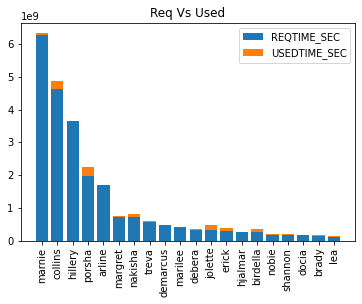

In [60]:


fig, ax = plt.subplots()
# First plot the 'Male' bars for every day.
ax.bar(gpu_completed_df_Top20.USER, gpu_completed_df_Top20['REQTIME_SEC'], label='REQTIME_SEC')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(gpu_completed_df_Top20.USER, gpu_completed_df_Top20['USEDTIME_SEC'], bottom=gpu_completed_df_Top20['REQTIME_SEC'],
       label='USEDTIME_SEC')
ax.set_title('Req Vs Used')
ax.legend()
plt.xticks(rotation = 90);



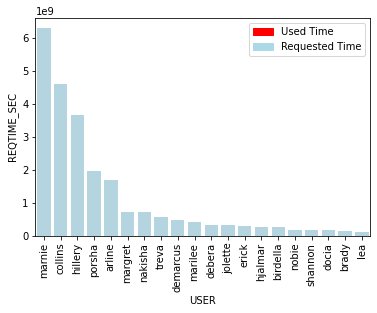

In [74]:
# bar chart 1 -> top bars
bar1 = sns.barplot(x="USER",  y="USEDTIME_SEC", data=gpu_completed_df_Top20, color='red')


# bar chart 2 -> bottom bars 
bar2 = sns.barplot(x="USER", y="REQTIME_SEC", data=gpu_completed_df_Top20, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='red', label='Used Time')
bottom_bar = mpatches.Patch(color='lightblue', label='Requested Time')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation = 90);

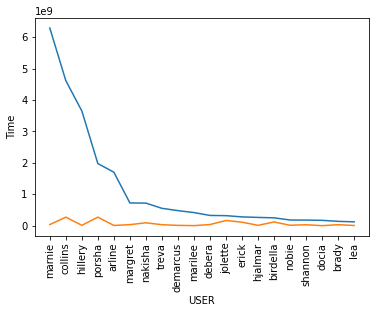

In [76]:
# time series plot for multiple columns
sns.lineplot(x="USER", y="REQTIME_SEC", data=gpu_completed_df_Top20)
sns.lineplot(x="USER", y="USEDTIME_SEC", data=gpu_completed_df_Top20)

# set label
plt.ylabel("Time")
plt.xticks(rotation = 90);
plt.show()


In [26]:
gpu_completed_df

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,REQTIME_HOURS,USEDTIME_HOURS,TIME_DIFF_SEC,TIME_DIFF_HOURS
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,172800,793,48.0,0.220278,172007,47.779722
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,18000,22,5.0,0.006111,17978,4.993889
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,18000,537,5.0,0.149167,17463,4.850833
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,72000,18586,20.0,5.162778,53414,14.837222
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,54000,15070,15.0,4.186111,38930,10.813889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,432000,52,120.0,0.014444,431948,119.985556
336934,46753820_26,harovin,porsha,5093.70,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,432000,2091,120.0,0.580833,429909,119.419167
336936,46753823,harovin,shannon,156.21,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,432000,243,120.0,0.067500,431757,119.932500
336942,46754095,harovin,shannon,2820.52,5-00:00:00,00:11:13,1,1,1,turing,0:0,COMPLETED,432000,673,120.0,0.186944,431327,119.813056


In [34]:
#Filter on 2 days of REQTIME_SEC
#gpu_completed_df[gpu_completed_df["TIME_DIFF_HOURS"] >= 47.75] 
gpu_completed_df[gpu_completed_df["REQTIME_HOURS"] >= 24 * 5] 

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,REQTIME_SEC,USEDTIME_SEC,REQTIME_HOURS,USEDTIME_HOURS,TIME_DIFF_SEC,TIME_DIFF_HOURS
327,32884086,glasshouse,miya,374.89,5-00:00:00,1-08:38:34,1,1,1,pascal,0:0,COMPLETED,432000,117514,120.0,32.642778,314486,87.357222
1063,32891995,glasshouse,erick,242.00,5-00:00:00,4-19:44:31,1,1,1,pascal,0:0,COMPLETED,432000,416671,120.0,115.741944,15329,4.258056
1064,32891996,glasshouse,erick,244.33,5-00:00:00,4-19:44:31,1,1,1,pascal,0:0,COMPLETED,432000,416671,120.0,115.741944,15329,4.258056
1065,32891997,glasshouse,erick,243.17,5-00:00:00,4-19:44:31,1,1,1,pascal,0:0,COMPLETED,432000,416671,120.0,115.741944,15329,4.258056
1066,32891998,glasshouse,erick,243.82,5-00:00:00,4-19:44:31,1,1,1,pascal,0:0,COMPLETED,432000,416671,120.0,115.741944,15329,4.258056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336929,46753800,harovin,shannon,160.03,5-00:00:00,00:00:37,1,1,1,turing,0:0,COMPLETED,432000,37,120.0,0.010278,431963,119.989722
336933,46753813,harovin,shannon,137.96,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,432000,52,120.0,0.014444,431948,119.985556
336934,46753820_26,harovin,porsha,5093.70,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,432000,2091,120.0,0.580833,429909,119.419167
336936,46753823,harovin,shannon,156.21,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,432000,243,120.0,0.067500,431757,119.932500


In [36]:
26807/283333 * 100

9.46130524859441

In [32]:
gpu_completed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283333 entries, 0 to 336948
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   JOBID            283333 non-null  object 
 1   ACCOUNT          283333 non-null  object 
 2   USER             283333 non-null  object 
 3   USEDMEM          283333 non-null  float64
 4   REQTIME          283333 non-null  object 
 5   USEDTIME         283333 non-null  object 
 6   NODES            283333 non-null  int64  
 7   CPUS             283333 non-null  int64  
 8   GPUS             283333 non-null  int64  
 9   PARTITION        283333 non-null  object 
 10  EXITCODE         283333 non-null  object 
 11  STATE            283333 non-null  object 
 12  REQTIME_SEC      283333 non-null  int64  
 13  USEDTIME_SEC     283333 non-null  int64  
 14  REQTIME_HOURS    283333 non-null  float64
 15  USEDTIME_HOURS   283333 non-null  float64
 16  TIME_DIFF_SEC    283333 non-null  int6